In [2]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import eofs.standard as Eof_st
from eofs.multivariate.standard import MultivariateEof

from scipy.signal import butter, lfilter
from scipy.signal import convolve

import utilities

import importlib
def reimport_module(module_name):
    """
    Reimports the specified Python module.
    
    Args:
    module_name (module): The module to be reimported, typically passed as a variable.
    
    Returns:
    module: The reloaded module.
    """
    try:
        # Reload the already imported module
        reloaded_module = importlib.reload(module_name)
        print(f"Module {module_name.__name__} reloaded successfully.")
        return reloaded_module
    except Exception as e:
        print(f"Failed to reload module: {e}")

reimport_module(utilities)

Module utilities reloaded successfully.


<module 'utilities' from '/glade/work/wchapman/DA_ML/CESML_AI/Paper_Figures/CMJO_Diagnostics_Tool/utilities.py'>

## Bootstrap?

In [3]:
bootstrap=True
if bootstrap:
    from xbootstrap import block_bootstrap

## Files_in

In [118]:
print(f'You are required to run the 13_Generate_EOFS routine before this one...')

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts/climo'

# filolr =  'ERA5.h1.FLUT.anomalies.1979010100000-1993123100000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'ERA5.h1.U850.anomalies.1979010100000-1993123100000.nc'
# var_name_u850 = 'U850'
# filv850 = 'ERA5.h1.V850.anomalies.1979010100000-1993123100000.nc'
# var_name_v850 = 'V850'
# filu200 = 'ERA5.h1.U200.anomalies.1979010100000-1993123100000.nc' 
# var_name_u200 = 'U200'
# filz500 = 'ERA5..h1.Z500.anomalies.1979010100000-1993123100000.nc'
# var_name_z500 = 'Z500'
# z500_factor=1

# phases_in = 'ERA5.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_tot/ts/climo/'
# filolr =  'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.FLUT.anomalies.1979010100000-1993122700000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.U850.anomalies.1979010100000-1993122700000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.U200.anomalies.1979010100000-1993122700000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.V850.anomalies.1979010100000-1993122700000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.Z500.anomalies.1979010100000-1993122700000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'


dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts/climo/'
dir_in2 = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts/climo'
filttend = 'f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.DTCOND.anomalies.1979010100000-1990122200000.nc'
var_name_ttend = 'DTCOND'
phases_in = 'f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'


###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo_tot/ts/climo/'
# filolr =  'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.FLUT.anomalies.1979010100000-1993122700000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.U850.anomalies.1979010100000-1993122700000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.U200.anomalies.1979010100000-1993122700000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.V850.anomalies.1979010100000-1993122700000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.Z500.anomalies.1979010100000-1993122700000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo_tot/ts/climo/'
# filolr =  'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.FLUT.anomalies.1979010100000-1991122700000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.U850.anomalies.1979010100000-1991122700000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.U200.anomalies.1979010100000-1991122700000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.V850.anomalies.1979010100000-1991122700000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.Z500.anomalies.1979010100000-1991122700000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_fullCNN/ts/climo/'
# filolr =  'f.e.FTORCHmjo_fullCNN.cam.h1.FLUT.anomalies.1979010100000-1993123100000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_fullCNN.cam.h1.U850.anomalies.1979010100000-1993123100000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_fullCNN.cam.h1.U200.anomalies.1979010100000-1993123100000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_fullCNN.cam.h1.V850.anomalies.1979010100000-1993123100000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_fullCNN.cam.h1.Z500.anomalies.1979010100000-1993123100000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_fullCNN.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################
dir_out = f'{dir_in}/mjo_diag/'
# Check if the directory exists
if not os.path.exists(dir_out):
    # Create the directory
    os.makedirs(dir_out)
    print(f"Directory {dir_out} created.")
    
save_Fig_out = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_COMPOSITE_EOFS_{var_name_ttend}_{var_name_u200}_{var_name_u850}.png'
save_Fig_out_2 = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_COMPOSITE_234_567_EOFS_{var_name_ttend}_{var_name_u200}_{var_name_u850}.png'
print(f'saving figure to {save_Fig_out}')
save_NC_out = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_Bootstrapped_COMPOSITE_EOFS_{var_name_ttend}_{var_name_u200}_{var_name_u850}.nc'
print(f'saving figure to {save_NC_out}')
save_NPZ_out = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_Bootstrapped_COMPOSITE_234_567_EOFS_{var_name_ttend}_{var_name_u200}_{var_name_u850}.npz'
print(f'saving figure to {save_NPZ_out}')

You are required to run the 13_Generate_EOFS routine before this one...
saving figure to /glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts/climo//mjo_diag//f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.MJO_COMPOSITE_EOFS_DTCOND_U200_U850.png
saving figure to /glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts/climo//mjo_diag//f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.MJO_Bootstrapped_COMPOSITE_EOFS_DTCOND_U200_U850.nc
saving figure to /glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts/climo//mjo_diag//f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.MJO_Bootstrapped_COMPOSITE_234_567_EOFS_DTCOND_U200_U850.npz


## Read in Data

In [119]:
# TTEND: 
file_path_ttend = os.path.join(dir_in2, filttend)  # Join the directory and file name
DS_ttend = xr.open_dataset(file_path_ttend)

# DS_phases
file_path_phases = os.path.join(dir_out, phases_in)  # Join the directory and file name
DS_phases = xr.open_dataset(file_path_phases)

#create cosine latitude weighting: 
weights = np.cos(np.deg2rad(DS_ttend.lat))

## Wintertime Baby!

In [120]:
%%time
NDFJMA_ttend = DS_ttend.where((DS_ttend['time.month'] >= 11) | (DS_ttend['time.month'] <= 5), drop=True)
NDFJMA_phases = DS_phases.where((DS_phases['time.month'] >= 11) | (DS_phases['time.month'] <= 5), drop=True)

CPU times: user 11.9 s, sys: 1min, total: 1min 12s
Wall time: 1min 57s


## Winter time baby

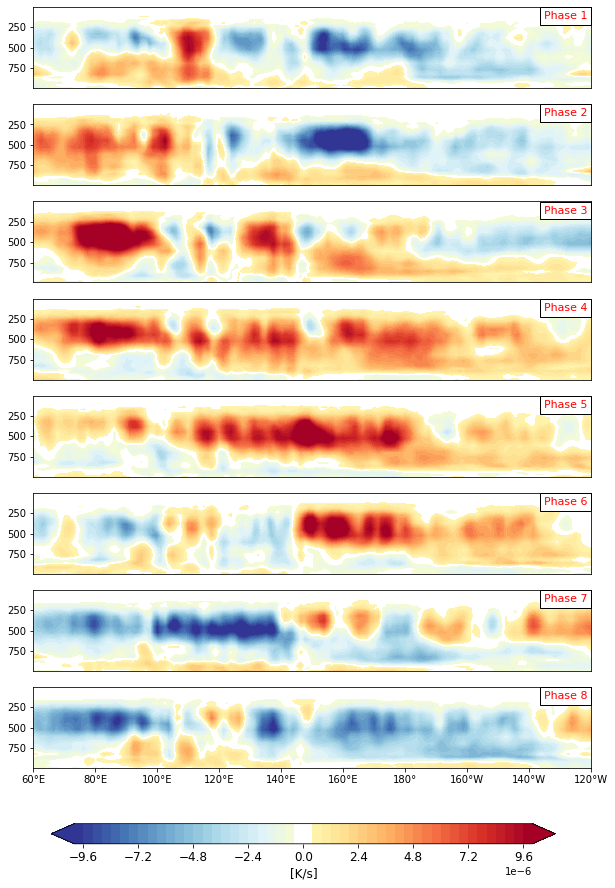

In [131]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

clevs = np.arange(-.1, .104, .004)*10e-5
bluey = mpl.cm.get_cmap('RdYlBu_r', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)
cbar_lab ='[K/s]'
pf_scale = 1

svout = np.zeros([8,32,22,145])
#begin fig
fig = plt.figure(figsize=(10, 14))  # Adjusted figure size for 8 panels


for ee,phs in enumerate(range(1,9)):
    inds = np.where(NDFJMA_phases['RMMphase_obs']==phs)[0]
    
    ax = plt.subplot(8, 1, phs)  # Dynamic subplot creation

    pfield = NDFJMA_ttend.isel(time=inds).mean('time')[var_name_ttend]
    pfield_save = pfield.sel(lat=slice(-10,10),lon=slice(60,240))

    svout[ee] = pfield_save.values
    
    pfield = pfield.sel(lat=slice(-10,10),lon=slice(60,240)).mean(['lat'])
    # Apply the mask: Replace vectors with small magnitudes with NaNs

    # Subsampling for quiver plot clarity
    
    # Plotting
    bb = ax.contourf(pfield['lon'], pfield['lev'], pfield, levels=clevs, cmap=cmapzzz,  extend='both')
    
    # Set ticks, labels, and title dynamically
    if phs == 8:
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([])
    
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=11, verticalalignment='top'
            , horizontalalignment='right', bbox=props)
    ax.invert_yaxis()

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=cbar_lab,fontsize=12)
fig.subplots_adjust(hspace=0.2)  # Adjust spacing as needed
plt.savefig(save_Fig_out,bbox_inches='tight',dpi=400)
plt.show()
np.savez(save_NPZ_out,svout=svout,lat=pfield_save['lat'],lon=pfield_save['lon'],lev=pfield_save['lev'])

## Just 2,3,4 and 5,6,7

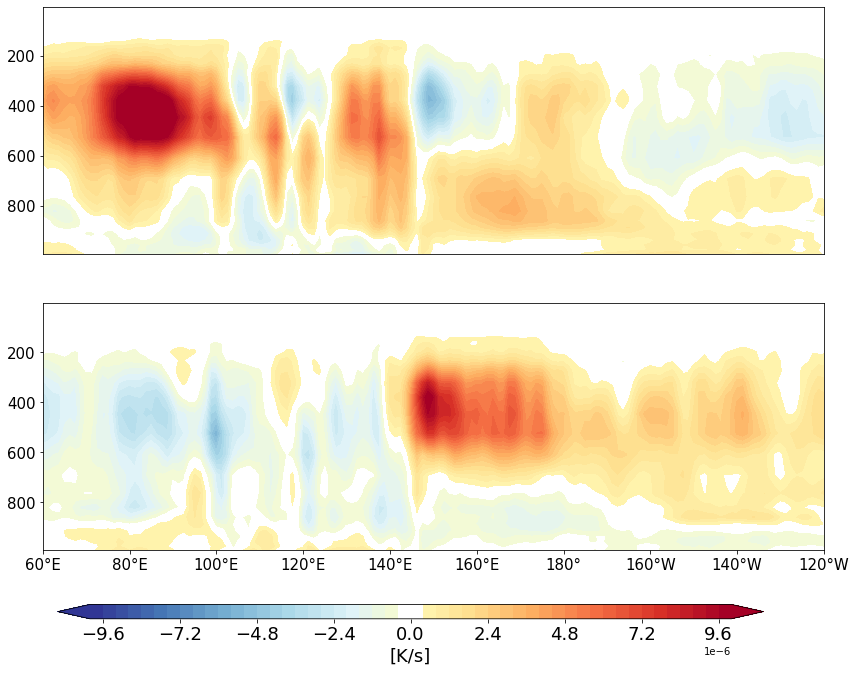

In [130]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

clevs = np.arange(-.1, .104, .004)*10e-5
bluey = mpl.cm.get_cmap('RdYlBu_r', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)
cbar_lab ='[K/s]'
pf_scale = 1

svout = np.zeros([2,32,22,145])
#begin fig
fig = plt.figure(figsize=(14, 10))  # Adjusted figure size for 8 panels

#begin fig

for ee, phs in enumerate([[2,3,4],[5,6,7]]):
    inds = np.where(np.isin(NDFJMA_phases['RMMphase_obs'], phs))[0]
    
    ax = plt.subplot(2, 1, ee+1)  # Dynamic subplot creation
    
    pfield = NDFJMA_ttend.isel(time=inds).mean('time')[var_name_ttend]
    pfield_save = pfield.sel(lat=slice(-10,10),lon=slice(60,240))

    svout[ee] = pfield_save.values
    
    pfield = pfield.sel(lat=slice(-10,10),lon=slice(60,240)).mean(['lat'])
    # Subsampling for quiver plot clarity
    
    # Plotting
    bb = ax.contourf(pfield['lon'], pfield['lev'], pfield, levels=clevs, cmap=cmapzzz,  extend='both')

    # Set ticks, labels, and title dynamically
    if ee == 1:
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([])
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))

    ax.invert_yaxis()
    ax.tick_params(labelsize=15)
    
# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.14, 0.03, 0.7, 0.02])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(label=cbar_lab,fontsize=18)
fig.subplots_adjust(hspace=0.2)  # Adjust spacing as needed
# plt.savefig(save_Fig_out_2,bbox_inches='tight',dpi=400)
# np.savez(save_NPZ_out,svout=svout,lat=lat,lon=lon)
plt.show()
np.savez(f'{save_NPZ_out.split(".npz")[0]}_234_567.npz',svout=svout,lat=pfield_save['lat'],lon=pfield_save['lon'],lev=pfield_save['lev'])

## Bootstrap the OLR Field for Bias

In [9]:
# for phs in range(1,9):
#     print(f'doing phase {phs:02}')
#     inds = np.where(NDFJMA_phases['RMMphase_obs']==phs)[0]
#     pfield = NDFJMA_olr.isel(time=inds)

#     # Create 500 circularly bootstrapped resamples of ds1, ds2 and ds3
#     # using a blocksize of 5 for the time dimension and 1 for the ensemble
#     # dimension, and only bootstrapping the time dimension for ds2
#     print('.... create block ensemble ...')
#     pfield_bs = block_bootstrap(
#         pfield['OLR_f'],
#         blocks={"time": 5},
#         n_iteration=500,
#         circular=True,
#     )
#     print('....taking mean...')
#     pfield_bs_mean = pfield_bs.mean('time')
#     print('.... quantiles ....')
#     pfield_bs_mean_quantile95 = pfield_bs_mean.quantile(q=.95, dim='iteration').to_dataset(name='OLR_f_mean_q95')
#     pfield_bs_mean_quantile99 = pfield_bs_mean.quantile(q=.99, dim='iteration').to_dataset(name='OLR_f_mean_q99')
#     pfield_bs_mean_quantile05 = pfield_bs_mean.quantile(q=.05, dim='iteration').to_dataset(name='OLR_f_mean_q05')
#     pfield_bs_mean_quantile01 = pfield_bs_mean.quantile(q=.01, dim='iteration').to_dataset(name='OLR_f_mean_q01')
#     pfield_out = pfield['OLR_f'].mean('time').to_dataset(name = 'OLRf_mean')
    
#     pfield_bs_mean_quantile = xr.merge([pfield_out, pfield_bs_mean_quantile01, pfield_bs_mean_quantile05, 
#                                         pfield_bs_mean_quantile99,
#                                         pfield_bs_mean_quantile95], compat='override')

#     pfield_bs_mean_quantile.to_netcdf(f'{save_NC_out.split(".nc")[0]}_phase{phs:03}.nc')
    

In [147]:
DS = xr.open_dataset('/glade/campaign/cgd/tss/people/mdfowler/GustProject/GustFix/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006/atm/hist/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.0005-10-05-00000.nc')

In [148]:
DS

<xarray.Dataset>
Dimensions:       (lat: 192, lon: 288, lev: 58, ilev: 59, trop_cld_lev: 58,
                   time: 31, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.3 357.5 358.8
  * lev           (lev) float64 3.018 5.445 9.087 14.25 ... 983.2 991.2 997.5
  * ilev          (ilev) float64 2.055 3.98 6.909 11.27 ... 987.4 995.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 3.018 5.445 9.087 ... 983.2 991.2 997.5
  * time          (time) object 0005-10-04 12:00:00 ... 0005-11-03 12:00:00
Dimensions without coordinates: nbnd
Data variables: (12/35)
    w             (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    ...            ...
    U10           (time, lat, lon) float32 ...
    U200          (time, lat, lon) float32 ...
    U850          (time, lat, lon) float32 ...
    UGUST         (time, lat, lon) float32 ...
    V200          (time, lat, lon) float32 ...
    V850          (time, lat, lon) float32 ...
Attributes:
    interp_type:       bilinear
    interp_outputgri:  equally spaced with poles
    Conventions:       CF-1.0
    source:            CAM
    case:              FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam...
    logname:           mdfowler
    host:              derecho1
    initial_file:      f.cam6_3_107.FLTHIST_v0a.ne30.clm5_1.001.cam.i.1994-01...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/s...
    model_doi_url:     not_set
    time_period_freq:  day_1